In [6]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [45]:
#d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
#fig, ax = plt.subplots(1, 1)
#ax.hist(d,100, density=True)
#plt.tick_params(labelsize = 24)
#plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
#plt.show()

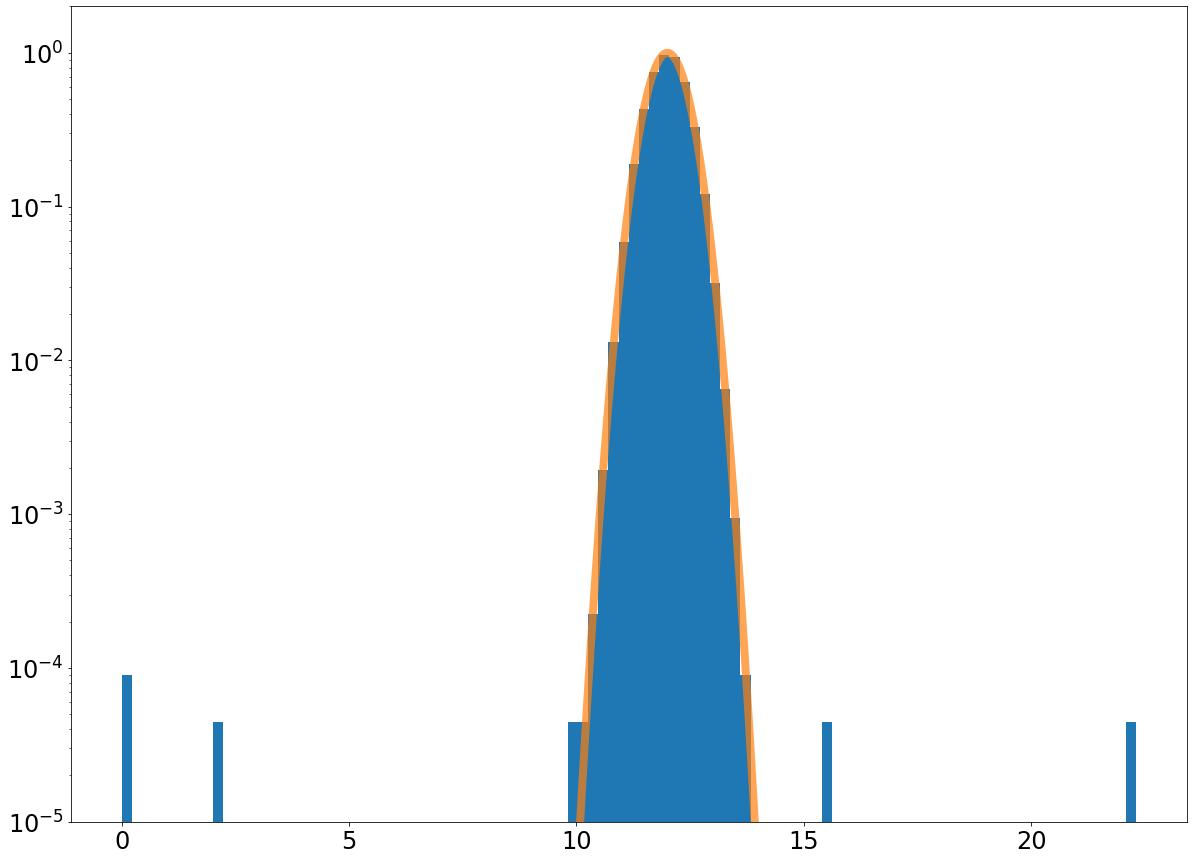

In [26]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
x = np.linspace(9,14,100000)
ax.plot(x,stats.norm.pdf(x,loc = 12., scale = 0.4),linewidth = 8,alpha = 0.7)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.ylim([10e-6,2])
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()



We know the good data is gaussian. and we know the general limits of that gaussian. We need to rule out bad data by finding what data fits the gaussian limits and what doesnt.

In [67]:
D =  pd.DataFrame({'Data': d})
D_sorted = D.sort_values(['Data'])
Bad = D_sorted.query("Data < 10.4 or Data > 14")
print(Bad['Data'].count(), 'bad data points detected: ', Bad['Data'].values)

9 bad data points detected:  [ 0.          0.          2.1        10.         10.18417661 10.3
 10.37428907 15.6        22.3       ]


 
 
With the above filter our truth table looks like:

Your Test Good (true T): 99998

Your Test Good (Bad T): 1

Your Test Bad (true T): 7

Your Test Bad (Bad T): 2
 
 
To get as much "bad data" as possible we need to make our "good data" cut off very close to the gaussian limits. This means that we may end up throwing out good data. This is an arbitrary line in the sand, but one that is educated by the fact that it may be more important to remove outlying bad data than it is to keep the good data at the limits of the gaussian. The tighter in we draw the limits the more good data we throw out, in a relatively predictable way. For this analysis we were very carfeul witht the limits and had removed 7/8 bad data points with only 2 good data points being removed with them. 


Our limits left one bad data point in the background. This value was closer to the mean of the background gaussian distribution, so to remove this point we would have to cut away ALLOT of good data. It was decided that one extra data point closer to the mean will make very little difference relative to a handful of extreme outlyers, and it wouldnt be worth removing a significant portion of good data. So while this bad data commission is technicly avoidable, it is more resonable to keep it in there. 

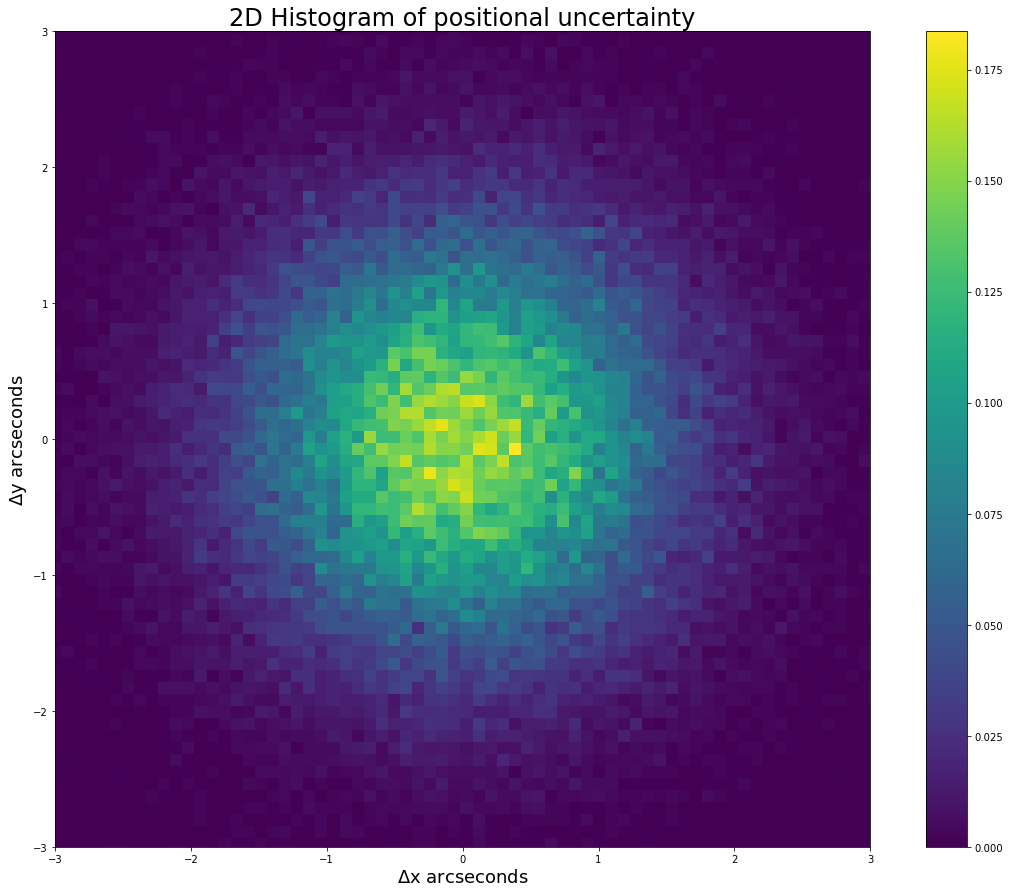

In [68]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

2 )If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

The total distance the asteroid could move in 2D is equal to the x component and the y component treated like vector components of a vector magnitutde.  Distance = sqrt(x^2+y^2)

In Homework 3 we found that, "The amplitude of a x-y vector is = sqrt(x^2 + y^2), the probability distributions should be similiar... A single "squared" Normal distribution leads to a Chi-Square distribution, In this case we have X and Y so this Chi squared distribution will have 2 degrees of freedom. A Chi square distribution with 2 degrees of freedom leads to an exponential distribution. And finally the square root of an exponential distribution becomes a Rayleigh distribution. " 

Using this analytical technique, we should be able to find the proabability of 5 sigma, and what x value that corralates to on a rayleigh distribution.

In [19]:
from scipy.stats import rayleigh
from scipy.stats import poisson

In [44]:
rayleigh.ppf(1 - norm.cdf(5)) # this will out put the sigma value of the rayleigh distrabution, but we know 1 sigma is one arcsecond so we should be able to assume a 1:1 relationship for the output

0.0007571678981680416

It seems any movement of more than 0.000757 arcseconds could mean a we have a real asteroid. 

3)

We need to pick a distribution to model the background cosmic ray signal, knowing the mean will be 1 signal a minute or 7200 signals for 8 hours a day over 15 days. Using our measured data for the moons cosmic ray signal (6800) and this background distrabution, we should be able to come up with a probability and a sigma value. 

In [41]:
(1*60*8*15) # moon cosmic rays per second

7200

In [43]:
mu = 7200
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
Background = stats.poisson(mu)
norm.ppf(1-Background.cdf(6800))

4.750747965778662

Pluging in the numbers we get a probability of 4.75 sigma, very close to a significant observation, but not quite.( We may never know if the moon really exsists.)

Notes on the problem:

This problem is different than allot of the previous problems because we are not given a distinct distribution or allot of data to generate a distribution. We have to make an assumption about the background cosmic ray signal with just the mean value being known. This assumption could significantly change the sigma value we come to. 

Also, the valididity of this experiment is questionable. We are making an assumption already that the moon is a thing and we are pointing at it, and using that data to see if we are pointing at anything? And notably we get a negitive result, for an expirement that requires we assume the moon exsists in the first place.